# Introduction


In this lab, we will use the scikit-learn library to train a random forest on the Olivetti Faces dataset and evaluate the impurity-based feature importance. We will use the feature importances to create a heat map of the pixel importances. We will also parallelize the construction and computation of the predictions within multiple jobs.



# Load the data and model fitting

We begin by loading the Olivetti Faces dataset and limiting the dataset to contain only the first five classes. Then we train a random forest on the dataset and evaluate the impurity-based feature importance. We will set the number of cores to use for the tasks.

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# We select the number of cores to use to perform parallel fitting of
# the forest model. `-1` means use all available cores.
n_jobs = -1

# Load the faces dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

# Limit the dataset to 5 classes.
mask = y < 5
X = X[mask]
y = y[mask]

# A random forest classifier will be fitted to compute the feature importances.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

forest.fit(X, y)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/Macbook/scikit_learn_data


RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

# Evaluate Feature Importance

We evaluate the feature importance based on mean decrease in impurity (MDI). Feature importances are provided by the fitted attribute **feature_importances_** and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

Elapsed time to compute the importances: 0.076 seconds


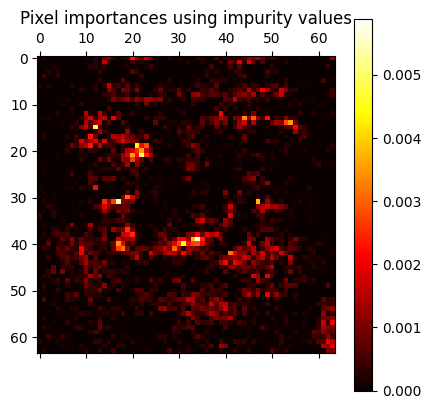

In [2]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
img_shape = data.images[0].shape
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

# Interpret the Heatmap

The heat map shows the pixel importances. The hotter the pixel, the more important it is. We can observe the important pixels that contribute to the classification of the Olivetti Faces dataset.

# Summary

In this lab, we learned how to train a random forest on the Olivetti Faces dataset and evaluate the impurity-based feature importance. We created a heat map of the pixel importances and observed the important pixels that contribute to the classification of the Olivetti Faces dataset.